# Tutorial 4: multi_period_Sioux_Falls

This dataset illustrates a network that includes different time periods for demand, and the full text will cover these topics:
* Network data: reading and presentation of core data files
* The main programme: running the DTA module of path4gmns
* Results: reading and analysing the output

With this tutorial,you can learn about this multi period dataset and how to deal with the infomation contained in it.

Above all, make sure you have prepared the following dependencies:

In [1]:
import pandas as pd
import path4gmns as pg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

path4gmns, version 0.9.7


## 1. Network data
Before proceeding with the path4GMNS-DTA, you can use pandas to read the input data, as the following code shows.<br>

In [2]:
mini_path = "./04_multi_period_Sioux_Falls/minimum_input/"
node = pd.read_csv(mini_path+'node.csv') 
link = pd.read_csv(mini_path+'link.csv')  
demand = pd.read_csv(mini_path+'demand.csv')  #OD-demand
demand_period = pd.read_csv(mini_path+'demand_period.csv')  
demand_files = pd.read_csv(mini_path+'demand_file_list.csv') 

The first two files, node.csv and link.csv, contains your basic information about the physical network.

In [3]:
node

,name,node_id,zone_id,x_coord,y_coord,district_id
0,NaN,1,1,-96.770420,43.612828,1.0
1,NaN,2,2,-96.711251,43.605813,2.0
2,NaN,3,3,-96.774303,43.572962,NaN
3,NaN,4,4,-96.747168,43.563654,NaN
4,NaN,5,5,-96.731569,43.564034,NaN
5,NaN,6,6,-96.711644,43.587586,NaN
6,NaN,7,7,-96.693423,43.563844,NaN
7,NaN,8,8,-96.711382,43.562324,NaN
8,NaN,9,9,-96.731241,43.548596,NaN
9,NaN,10,10,-96.731438,43.545271,NaN


In [4]:
link

,name,link_id,from_node_id,to_node_id,dir_flag,length,lanes,lanes_s0,capacity,free_speed,link_type,VDF_alpha,VDF_beta,geometry
0,NaN,1,1,2,1,6,1,1,25900.200640,60,1,0.15,4,"LINESTRING (-96.770451 43.612565, -96.711282 4..."
1,NaN,2,1,3,1,4,1,1,23403.473190,60,1,0.15,4,"LINESTRING (-96.770683 43.612854, -96.774567 4..."
2,NaN,3,2,1,1,6,1,1,25900.200640,60,1,0.15,4,"LINESTRING (-96.711219 43.606076, -96.770389 4..."
3,NaN,4,2,6,1,5,1,1,4958.180928,60,1,0.15,4,"LINESTRING (-96.711515 43.605819, -96.711909 4..."
4,NaN,5,3,1,1,4,1,1,23403.473190,60,1,0.15,4,"LINESTRING (-96.774040 43.572936, -96.770156 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,NaN,72,23,22,1,4,1,1,5000.000000,60,1,0.15,4,"LINESTRING (-96.750904 43.514593, -96.731241 4..."
72,NaN,73,23,24,1,2,1,1,5078.508436,60,1,0.15,4,"LINESTRING (-96.751166 43.514820, -96.749462 4..."
73,NaN,74,24,13,1,4,1,1,5091.256152,60,1,0.15,4,"LINESTRING (-96.749272 43.503419, -96.793448 4..."
74,NaN,75,24,21,1,3,1,1,4885.357564,60,1,0.15,4,"LINESTRING (-96.749102 43.502919, -96.730880 4..."


The demand.csv shows the volume from each origin to destination.

In [5]:
demand

,o_zone_id,d_zone_id,volume
0,1,1,0
1,1,2,100
2,1,3,100
3,1,4,500
4,1,5,200
...,...,...,...
571,24,20,400
572,24,21,500
573,24,22,1100
574,24,23,700


As stated at the beginning, this dataset contains requirements for multiple time periods, and the demand_period.csv defines your basic provisions for each time period, such as the peak time.

In [6]:
demand_period

,first_column,demand_period_id,demand_period,notes,time_period,peak_time
0,NaN,1,am,weekday,0700_0800,730
1,NaN,2,md,saturday_md,1200_1300,1230
2,NaN,3,pm,weekday,1600_1700,1630


And the scale_factor is defined in demand_file_list.csv, which is used to calculate the specific demand for each time period(= volume * scale_factor).

In [7]:
demand_files

,first_column,file_sequence_no,scenario_index_vector,file_name,demand_period,mode_type,format_type,scale_factor,departure_time_profile_no,comment
0,0,1,0,demand.csv,am,auto,column,1.0,1,NaN
1,0,1,0,demand.csv,md,auto,column,0.8,1,NaN
2,0,1,0,demand.csv,pm,auto,column,1.5,1,NaN


Then,the following code helps to show your network diagram :

In [8]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.DiGraph()           # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)

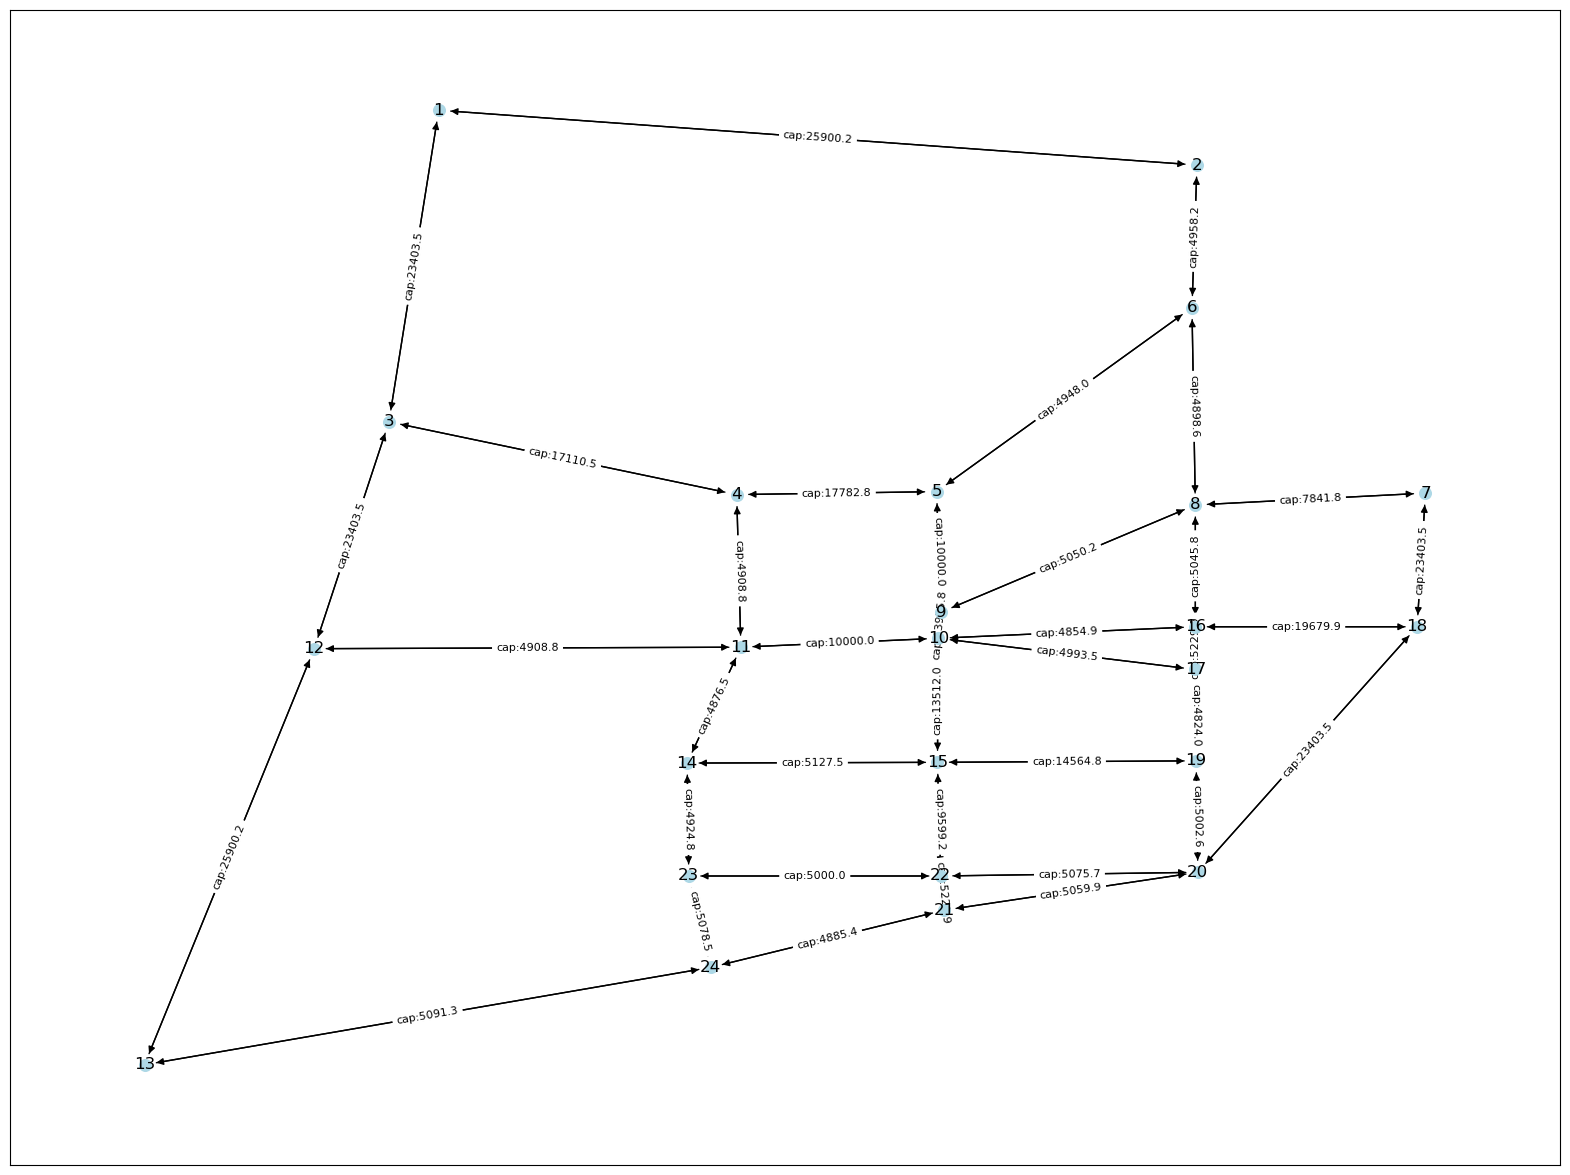

In [10]:
coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))

nx.draw_networkx_nodes(G, npos, node_color="lightblue",node_size=70)  # draw the nodes
nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels

str_cap = ["cap:"+ str('%.1f'% i) for i in list(link['capacity'])]
edge_labels = dict(zip(glink, str_cap))

nx.draw_networkx_edge_labels(G, npos, edge_labels, font_size=8) # show the capacity

plt.rcParams['figure.figsize']= (20, 15) 

This network contains 24 nodes and 76 links, and 576 couples of the traffic OD demand.

## 2.The main programme
After preparing the data, you can run the DTA module of path4GMNS, which is called in a very simple way as shown below.

In [11]:
cd .\04_multi_period_Sioux_Falls\minimum_input

C:\Users\Lenovo\path4GMNS_tutorial\04_multi_period_Sioux_Falls\minimum_input


In [12]:
pg.dtaapi.run_DTALite()


DTALite run starts

DTALite run completes!


In [13]:
!cd

C:\Users\Lenovo\path4GMNS_tutorial\04_multi_period_Sioux_Falls\minimum_input


You can ensure that the program is running correctly by outputting a list of files in the current directory (the directory where pg.dtaapi.run_DTALite is running) and comparing it to the reference output provided by the DTA-user-guide documentation.

In [14]:
files = os.listdir('.')
files

['choice_set_output_0_25nb.csv',
 'demand.csv',
 'demand_file_list.csv',
 'demand_period.csv',
 'departure_time_profile.csv',
 'district_performance_s0_25nb.csv',
 'dynamic_traffic_management.csv',
 'final_summary.csv',
 'link.csv',
 'link_performance_s0_25nb.csv',
 'link_performance_summary.csv',
 'link_performance_summary_2way.csv',
 'link_type.csv',
 'log_DTA.txt',
 'log_label_correcting.txt',
 'log_main.txt',
 'log_scenario.txt',
 'log_shortest_path_tree.csv',
 'log_simulation.txt',
 'log_subarea_focusing.txt',
 'log_traffic_assignment.csv',
 'model_link.csv',
 'model_node.csv',
 'mode_type.csv',
 'node.csv',
 'od_performance_summary.csv',
 'route_assignment_s0_25nb.csv',
 'scenario_index_list.csv',
 'sensor_data.csv',
 'settings.csv',
 'standard_solution_link_performance_comparison.xlsx',
 'subarea.csv',
 'system_performance_summary.csv',
 'zonal_hierarchy_mapping.csv']

## 3.Results
### a. Route assignment results
This result is output by the programme in route_assignment_[scenarioname].csv. This part presents the feasible routes between the OD pairs, the traffic assignment of each route after DTA, and other data such as route passing time.

In [15]:
routeDF = pd.read_csv('route_assignment_s0_25nb.csv')

Route result:

In [16]:
routeDF

,first_column,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,...,sequential_link_delay,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,
NaN,1,1,2,0,1,1->2,0,auto,am,100.0000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,auto,md,80.0000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,3,1,2,0,1,1->2,0,auto,pm,150.0000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4,1,3,0,2,1->3,0,auto,am,100.0000,...,4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,5,1,3,0,2,1->3,0,auto,md,80.0000,...,4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,4306,24,22,23,21,24->22,0,auto,pm,553.8309,...,2.000;4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4307,24,22,23,21,24->22,0,auto,pm,0.0000,...,2.000;4.000;5.000;3.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4308,24,23,23,22,24->23,0,auto,am,700.0000,...,2.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4309,24,23,23,22,24->23,0,auto,md,560.0000,...,2.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# The original document has a line first_column, which will cause data misalignment merger
# Here is to fix the problem of misalignment
col=list(routeDF.columns)
col.remove('first_column')
col.append('last')
dic=dict(zip(list(routeDF.columns),col))
route=routeDF.rename(columns=dic)

Corrected route result:

In [18]:
route

,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,volume,...,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,,last
NaN,1,1,2,0,1,1->2,0,auto,am,100.0000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,1,2,0,1,1->2,0,auto,md,80.0000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,3,1,2,0,1,1->2,0,auto,pm,150.0000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4,1,3,0,2,1->3,0,auto,am,100.0000,...,4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,5,1,3,0,2,1->3,0,auto,md,80.0000,...,4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,4306,24,22,23,21,24->22,0,auto,pm,553.8309,...,2.000;4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4307,24,22,23,21,24->22,0,auto,pm,0.0000,...,2.000;4.000;5.000;3.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4308,24,23,23,22,24->23,0,auto,am,700.0000,...,2.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4309,24,23,23,22,24->23,0,auto,md,560.0000,...,2.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter the data by column name to see the more intuitive and critical part of the route results. This part presents the node sequence and link sequence of each route, as well as the traffic flow volume that passes on each route.

In [19]:
route[['route_seq_id','od_pair_key','mode_type','volume','travel_time','node_sequence','link_id_sequence','demand_period']]

,route_seq_id,od_pair_key,mode_type,volume,travel_time,node_sequence,link_id_sequence,demand_period
NaN,1,1->2,auto,100.0000,6.0009,1;2;,1;,am
NaN,2,1->2,auto,80.0000,6.0002,1;2;,1;,md
NaN,3,1->2,auto,150.0000,6.0336,1;2;,1;,pm
NaN,4,1->3,auto,100.0000,4.0089,1;3;,2;,am
NaN,5,1->3,auto,80.0000,4.0019,1;3;,2;,md
...,...,...,...,...,...,...,...,...
NaN,4306,24->22,auto,553.8309,49.5722,24;23;22;,76;72;,pm
NaN,4307,24->22,auto,0.0000,92.8429,24;23;14;15;22;,76;71;41;46;,pm
NaN,4308,24->23,auto,700.0000,3.6918,24;23;,76;,am
NaN,4309,24->23,auto,560.0000,2.6206,24;23;,76;,md


Since you have given different time periods in the input file, it have generated different time period assignment results(for am, md ,pm). When analysing and using this part of the data, you need to extract these three period separately.

In [20]:
route_am = route[route['demand_period']=='am']
route_md = route[route['demand_period']=='md']
route_pm = route[route['demand_period']=='pm']

The assignment result for am:

In [21]:
route_am

,route_seq_id,o_zone_id,d_zone_id,o_super_zone_index,d_super_zone_index,od_pair_key,information_type,mode_type,demand_period,volume,...,sequential_link_FFTT,DTM_OD_impact,DTM_path_impact,DTM_#_of_lane_closure_links,DTM_new_path_generated,DTM_volume_before,DTM_volume_after,DTM_volume_diff,,last
NaN,1,1,2,0,1,1->2,0,auto,am,100.000,...,6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4,1,3,0,2,1->3,0,auto,am,100.000,...,4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,7,1,4,0,3,1->4,0,auto,am,500.000,...,4.000;4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,10,1,5,0,4,1->5,0,auto,am,200.000,...,4.000;4.000;2.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,14,1,6,0,5,1->6,0,auto,am,300.000,...,6.000;5.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,4296,24,21,23,20,24->21,0,auto,am,500.000,...,3.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4297,24,21,23,20,24->21,0,auto,am,0.000,...,2.000;4.000;5.000;6.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4301,24,22,23,21,24->22,0,auto,am,692.792,...,3.000;2.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4302,24,22,23,21,24->22,0,auto,am,407.208,...,2.000;4.000;,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And the assignment results for md and pm are similar to it, you can try it by yourself.

**EXAMPLE：** <br>
You can organise the results of the route flow assignment into py-dictionary so that you can see all feasible routes. The following dictionary structure has a structure like "index - path nodes", but you can organise the data in other ways as you need.
It's for the time period am.

In [22]:
route_dict = dict(zip(zip(list(route_am['o_zone_id']),list(route_am['d_zone_id'])),list(route_am['node_sequence'])))
route_dict

{(1, 2): '1;2;',
 (1, 3): '1;3;',
 (1, 4): '1;3;4;',
 (1, 5): '1;3;4;5;',
 (1, 6): '1;3;4;5;6;',
 (1, 7): '1;3;4;5;9;8;7;',
 (1, 8): '1;3;4;5;9;8;',
 (1, 9): '1;3;12;11;10;9;',
 (1, 10): '1;3;12;11;10;',
 (1, 11): '1;3;12;11;',
 (1, 12): '1;3;12;',
 (1, 13): '1;3;12;13;',
 (1, 14): '1;3;12;13;24;23;14;',
 (1, 15): '1;3;12;11;14;15;',
 (1, 16): '1;3;4;5;9;8;7;18;16;',
 (1, 17): '1;2;6;8;16;17;',
 (1, 18): '1;3;4;5;9;8;7;18;',
 (1, 19): '1;2;6;8;7;18;20;19;',
 (1, 20): '1;3;4;5;9;10;15;19;20;',
 (1, 21): '1;3;4;5;9;10;15;19;20;21;',
 (1, 22): '1;3;12;13;24;23;22;',
 (1, 23): '1;3;12;13;24;23;',
 (1, 24): '1;3;12;13;24;',
 (2, 1): '2;1;',
 (2, 3): '2;1;3;',
 (2, 4): '2;6;5;4;',
 (2, 5): '2;6;5;',
 (2, 6): '2;6;',
 (2, 7): '2;1;3;4;5;9;8;7;',
 (2, 8): '2;1;3;4;5;9;8;',
 (2, 9): '2;6;5;9;',
 (2, 10): '2;6;8;16;10;',
 (2, 11): '2;1;3;12;11;',
 (2, 12): '2;1;3;12;',
 (2, 13): '2;1;3;12;13;',
 (2, 14): '2;1;3;12;13;24;23;14;',
 (2, 15): '2;6;8;7;18;20;19;15;',
 (2, 16): '2;1;3;4;5;9;8;7;18;16;

### b. Link assignment results
This result is output by the program in link_assignment_[scenarioname].csv, presenting the assignment on the link.

In [23]:
linkDF = pd.read_csv('link_performance_s0_25nb.csv')
linkDF

,link_seq_id,link_id,vdf_type,from_node_id,to_node_id,lanes,distance_km,distance_mile,fftt,meso_link_id,...,DTM_speed_before,DTM_speed_after,DTM_speed_diff,DTM_DoC_before,DTM_DoC_after,DTM_Doc_diff,DTM_P_before,DTM_P_after,DTM_P_diff,notes
0,1,1,bpr,1,2,1.0,6.0,3.729024,6.0,-1,...,59.991,0.0,-59.991,0.176,0.0,-0.176,0.001,0.0,-0.001,period-based
1,1,1,bpr,1,2,1.0,6.0,3.729024,6.0,-1,...,59.998,0.0,-59.998,0.119,0.0,-0.119,0.000,0.0,-0.000,period-based
2,1,1,bpr,1,2,1.0,6.0,3.729024,6.0,-1,...,59.666,0.0,-59.666,0.440,0.0,-0.440,0.036,0.0,-0.036,period-based
3,2,2,bpr,1,3,1.0,4.0,2.486016,4.0,-1,...,59.866,0.0,-59.866,0.349,0.0,-0.349,0.014,0.0,-0.014,period-based
4,2,2,bpr,1,3,1.0,4.0,2.486016,4.0,-1,...,59.971,0.0,-59.971,0.238,0.0,-0.238,0.003,0.0,-0.003,period-based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,75,75,bpr,24,21,1.0,3.0,1.864512,3.0,-1,...,24.334,0.0,-24.334,1.768,0.0,-1.768,1.830,0.0,-1.830,period-based
224,75,75,bpr,24,21,1.0,3.0,1.864512,3.0,-1,...,4.583,0.0,-4.583,2.996,0.0,-2.996,3.342,0.0,-3.342,period-based
225,76,76,bpr,24,23,1.0,2.0,1.243008,2.0,-1,...,32.505,0.0,-32.505,1.541,0.0,-1.541,1.564,0.0,-1.564,period-based
226,76,76,bpr,24,23,1.0,2.0,1.243008,2.0,-1,...,45.791,0.0,-45.791,1.199,0.0,-1.199,1.175,0.0,-1.175,period-based


In [24]:
linkDF[['link_id','from_node_id','to_node_id','volume','time_period']]

,link_id,from_node_id,to_node_id,volume,time_period
0,1,1,2,4567.267,0700_0800
1,1,1,2,3072.078,1200_1300
2,1,1,2,11386.213,1600_1700
3,2,1,3,8178.091,0700_0800
4,2,1,3,5567.922,1200_1300
...,...,...,...,...,...
223,75,24,21,8637.423,1200_1300
224,75,24,21,14638.470,1600_1700
225,76,24,23,7826.033,0700_0800
226,76,24,23,6090.522,1200_1300


With the link_performance file and network files(link.csv and node.csv), you can use the following code to get the network with assignment flow result on link. Also, you should check for the three pieces of time period separately.<br>
**But please note, that the description for the time period in this file is not 'demand_period' but 'time_period':**

In [26]:
link_am=linkDF[linkDF['time_period']=='0700_0800']  #am
link_md=linkDF[linkDF['time_period']=='1200_1300']  #md
link_pm=linkDF[linkDF['time_period']=='1600_1700']  #pm

In [27]:
link_am

,link_seq_id,link_id,vdf_type,from_node_id,to_node_id,lanes,distance_km,distance_mile,fftt,meso_link_id,...,DTM_speed_before,DTM_speed_after,DTM_speed_diff,DTM_DoC_before,DTM_DoC_after,DTM_Doc_diff,DTM_P_before,DTM_P_after,DTM_P_diff,notes
0,1,1,bpr,1,2,1.0,6.0,3.729024,6.0,-1,...,59.991,0.0,-59.991,0.176,0.0,-0.176,0.001,0.0,-0.001,period-based
3,2,2,bpr,1,3,1.0,4.0,2.486016,4.0,-1,...,59.866,0.0,-59.866,0.349,0.0,-0.349,0.014,0.0,-0.014,period-based
6,3,3,bpr,2,1,1.0,6.0,3.729024,6.0,-1,...,59.991,0.0,-59.991,0.177,0.0,-0.177,0.001,0.0,-0.001,period-based
9,4,4,bpr,2,6,1.0,5.0,3.107520,5.0,-1,...,45.735,0.0,-45.735,1.201,0.0,-1.201,1.177,0.0,-1.177,period-based
12,5,5,bpr,3,1,1.0,4.0,2.486016,4.0,-1,...,59.867,0.0,-59.867,0.349,0.0,-0.349,0.014,0.0,-0.014,period-based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,72,72,bpr,23,22,1.0,4.0,2.486016,4.0,-1,...,19.787,0.0,-19.787,1.919,0.0,-1.919,2.009,0.0,-2.009,period-based
216,73,73,bpr,23,24,1.0,2.0,1.243008,2.0,-1,...,32.235,0.0,-32.235,1.548,0.0,-1.548,1.573,0.0,-1.573,period-based
219,74,74,bpr,24,13,1.0,4.0,2.486016,4.0,-1,...,13.775,0.0,-13.775,2.175,0.0,-2.175,2.318,0.0,-2.318,period-based
222,75,75,bpr,24,21,1.0,3.0,1.864512,3.0,-1,...,15.389,0.0,-15.389,2.097,0.0,-2.097,2.224,0.0,-2.224,period-based


In [28]:
link_am[['link_id','from_node_id','to_node_id','volume','time_period']]

,link_id,from_node_id,to_node_id,volume,time_period
0,1,1,2,4567.267,0700_0800
3,2,1,3,8178.091,0700_0800
6,3,2,1,4578.091,0700_0800
9,4,2,6,5953.912,0700_0800
12,5,3,1,8167.267,0700_0800
...,...,...,...,...,...
213,72,23,22,9592.754,0700_0800
216,73,23,24,7861.553,0700_0800
219,74,24,13,11072.662,0700_0800
222,75,24,21,10243.145,0700_0800


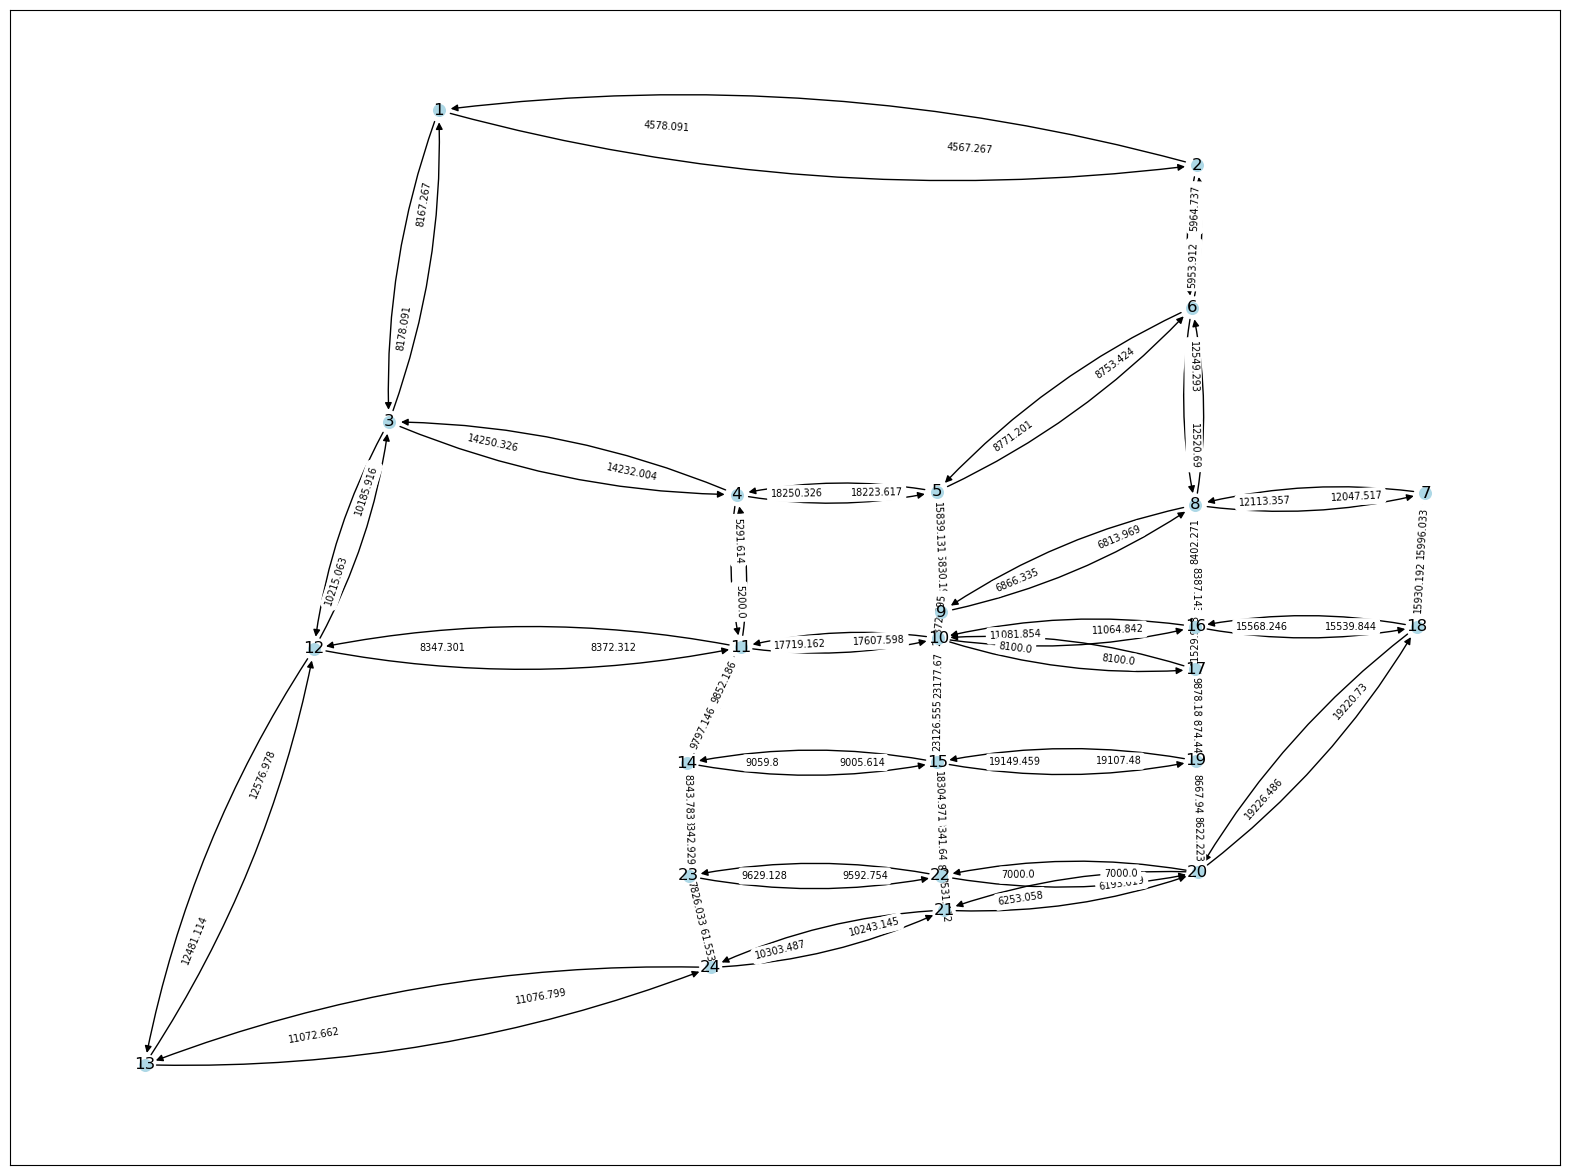

In [29]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.MultiDiGraph()       # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)

coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))
edge_labels = dict(zip(glink, list(link_am['volume'])))


nx.draw_networkx_nodes(G, npos, node_color="lightblue",node_size=70)  # draw the nodes
nx.draw_networkx_edges(G, npos, glink,connectionstyle='arc3, rad = 0.1')  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels

nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels,label_pos=0.3,font_size=7) # show the assignment flow result
plt.rcParams['figure.figsize']= (20, 15) 

### c. Summary of results
The program outputs various items such as runtime information, assignment results, and system performance to the final_summary.csv file, through which you can get the complete results of each part of the program. 
>However, it is not a strictly legal excel file, so it is recommended to check the final_summary.csv file directly when you need it, rather than reading it through the program.

In [30]:
col_names=[str(i) for i in range(12)]
data = pd.read_csv('final_summary.csv',header=None,names=col_names)

In [31]:
display(data.to_string()) # You can take this approach if you want to see the full table, but it's rather unintuitive

'                                                                                  0                                                                                                                                        1                                                    2                            3                                   4                   5                    6                    7                   8               9                 10                   11\n0                            [PROCESS INFO] Step 0: reading scenario_index_list.csv                                                                                                                                      NaN                                                  NaN                          NaN                                 NaN                 NaN                  NaN                  NaN                 NaN             NaN                NaN                  NaN\n1                                          